# Eigendecomposition 

> Eigendecomposition of a Matrix:  
> factorization of a matrix into a canonical form, whereby the matrix is represented in terms of its _eigenvalues_ and _eigenvectors_

+ https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix


> As we remember from our first linear algebra class in high school or college, both eigenvectors and eigenvalues are **providing us with information about the distortion of a linear transformation**: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.

In [1]:
import numpy as np
import plotly.graph_objects as go

## Intuitions on Eigenvalues and Eigenvectors

> Eigen is not a name, i.e. the method is not named after "Eigen";   
> eigen (pronounced eye-gan) is a **German word that means "own" or "innate"**, as in belonging to the parent matrix.

+ eigenvector as the special vector for a matrix $A$; when $A \cdot \vec{v}$, the resulting vector is a scaled $\vec{v}$
+ for each dimension in the parent matrix ($A$), there could be one set of _eigenvalue_ and _eigenvector_
+ Eigenvectors are unit vectors, 
  i.e. their length or magnitude is equal to 1.0
+ Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude
  + e.g. a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it.

can you visualize this: 
    
> Almost all vectors change direction, when they are multiplied by A. Certain exceptional vectors x are in the same direction as Ax. Those are the “eigenvectors”. Multiply an eigenvector by A, and the vector Ax is the number lambda times the original x. […] The eigenvalue lambda tells whether the special vector x is stretched or shrunk or reversed or left unchanged – when it is multiplied by A.



### Matrix as the _linear transformation_ of a Vector

> when a matrix is applied with a vector, the resulting vector has its direction changed

+ For a matrix $A$ and a vector $\vec v$, $A \cdot \vec v$ results in a vector with different direction

In [43]:
A = np.array([[-1, 3, 1], [2, -2, 0], [1, -3, 4]])
vec = np.array([[2], [1], [3]])
A.shape, vec.shape

((3, 3), (3, 1))

In [49]:
def plotly_vector(
    vec, 
    name, 
    opacity=1, 
    line_width=6, 
    color="black", # for line and cone, 
):
    x, y, z = vec
    
    cone = go.Cone(
        x=[x], y=[y], z=[z], 
        u=[0.1 * x], v=[0.1 * y], w=[0.1 * z], # cone size, to only 10% of the vector norm
        sizemode="scaled",
        sizeref=2,
        showscale=False,
        anchor="center",
        text=[f"l2 norm: {np.sqrt(np.sum(x**2 + y**2 + z**2)):.4f}"], 
        hoverinfo="x+y+z+text+name",
        colorscale=[[0, color], [1, color]],
        opacity=opacity, 
        name=name, 
    ) 
    
    line = go.Scatter3d(
        x=[0, x], y=[0, y], z=[0, z],
        marker=dict(size=1, color=color), # single dot at both end
        line=dict(width=line_width, color=color),  # the line
        opacity=opacity, 
        name=name
    )
    
    return cone, line

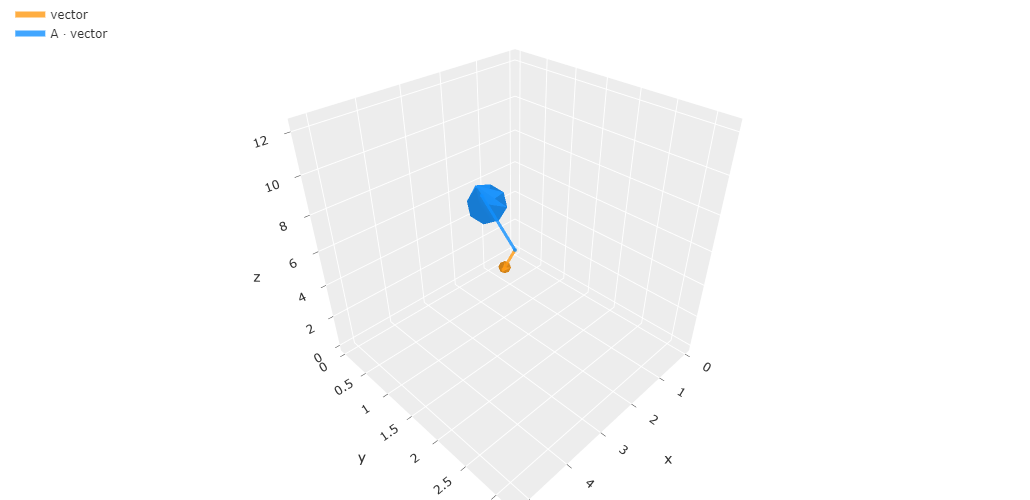

In [54]:
# vector
cone_v, line_v = plotly_vector(
    vec.flatten(), 
    "vector", color="#FF9A13", opacity=0.8
)
# A dot vector
cone_Av, line_Av = plotly_vector(
    np.dot(A, vec).flatten(), 
    "A ⋅ vector", color="#1190FF", opacity=0.8
)

layout = go.Layout(
    height=500, width=500, autosize=False,
    margin=dict(l=0, r=0, b=0, t=0),
    template="ggplot2", 
    scene=dict(
      aspectmode="cube",
    ),
    legend=dict(x=0.01, y=1), 
)

fig = go.Figure(data=[cone_v, line_v, cone_Av, line_Av], layout=layout)
fig.show(config={'displayModeBar': False, 'scrollZoom': False})
# note the dot product results in vector of different directions

### Eigenvector as the special vector

> when a matrix is applied with _its eigenvector_, the resulting vector has the same direction as the _eigenvector_



In [45]:
A = np.array([[-1, 3, 1], [2, -2, 0], [1, -3, 4]])
eigval, eigvec = np.linalg.eig(A)
A.shape, eigvec[:, 0].shape # taking only the first component

((3, 3), (3,))

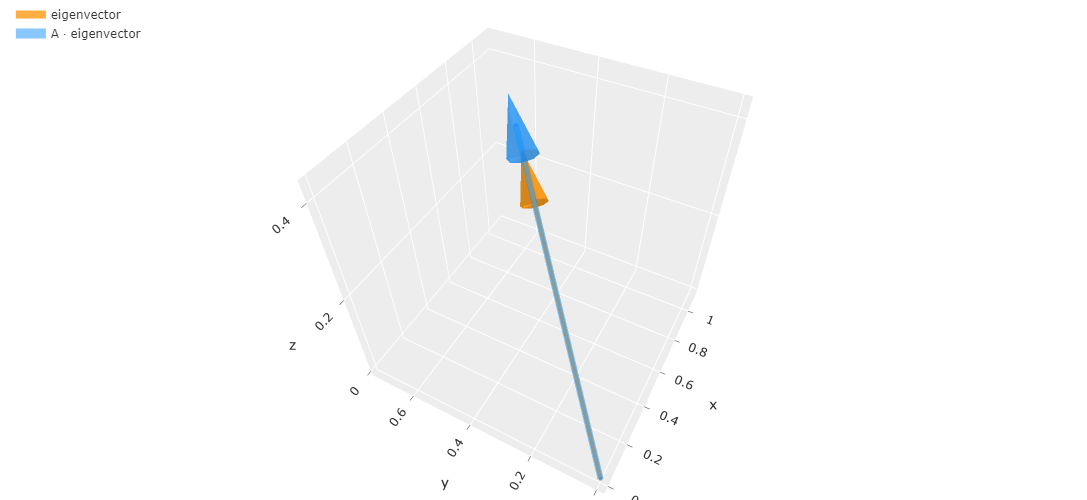

In [53]:
# vector
cone_v, line_v = plotly_vector(
    eigvec[:, 0], 
    "eigenvector", color="#FF9A13", opacity=0.8, line_width=8
)
# A dot vector
cone_Av, line_Av = plotly_vector(
    np.dot(A, eigvec[:, 0]), 
    "A ⋅ eigenvector", color="#1190FF", opacity=0.5, line_width=12, 
)

layout = go.Layout(
    height=500, width=500, autosize=False,
    margin=dict(l=0, r=0, b=0, t=0),
    template="ggplot2", 
    scene=dict(
      aspectmode="cube",
    ),
    legend=dict(x=0.01, y=1), 
)

fig = go.Figure(data=[cone_v, line_v, cone_Av, line_Av], layout=layout)
fig.show(config={'displayModeBar': False, 'scrollZoom': False})
# note the dot product results in vector of same direction
# TODO: plot the surface for (0, 0, 0)

Key Intuitions: 

+ Intuitively, 
  + the eigenvectors ($\vec v$) are _compresssing_ the information of a given matrix into unit vectors
  + and eigenvalues ($\lambda$) are just the magnitude to scale the eigenvector
+ With the equation of eigendecomposition: $A \cdot \vec v = \lambda \cdot \vec$
  + the plotted blue vector is on the left side
  + and the plotted orange vector is the eigenvector
+ In application, we just need the eigenvector (unit vector) since magnitude deosn't concern us

## Decomposition Manually

> get $n$ _eigenvalues_ and $n$ _eigenvectors_, where $n$ is the shape of a square matrix

A problem can be presented as an eigenvalue problem with _eigenvalue equation_:  

$$ \Large{ \boldsymbol{A} \cdot \boldsymbol{\vec{v}} = \lambda \cdot \boldsymbol{\vec{v}} }$$

where:  
+ $A$ is a square matrix with shape $(n, n)$, e.g. the covariance matrix
+ $\lambda$ is a scalar value 
+ $v$ is a non-zero matrix with shape $(n, 1)$, i.e. a vector

if the equation has a solution: 
+ $\lambda$ is the **eigenvalue** of the matrix $A$, sometimes called _characteristic value_
+ $v$ is the **eigenvector**, which corresponds to the eigenvalue

the equation can be re-written as: 

+ $A \cdot v - \lambda \cdot v = 0$, moving right side to left side
+ $A \cdot v - \lambda \cdot I_{n} \cdot v = 0$, where $I_{n}$ is an _identity matrix_ with shape $(n, n)$
+ $(A - \lambda \cdot I_{n}) \cdot v = 0$

further, if $v$ is a non-zero vector, it can be dropped: 
+ $(A - \lambda \cdot I_{n}) = 0$, this equation is called the _characteristic equation of $A$_

In [58]:
# plot to show the special vector: v, i.e. the eigen vector 
A = np.array([[2, 3, 1], [-1, 2, 3], [2, 4, -1]])
A

array([[ 2,  3,  1],
       [-1,  2,  3],
       [ 2,  4, -1]])

In [59]:
lambdas, vs = np.linalg.eig(A) 
lambdas, vs # eigenvalues and eigenvectors

(array([-3.        ,  1.58578644,  4.41421356]),
 array([[-0.12309149,  0.91109512,  0.72598109],
        [ 0.49236596, -0.23798157,  0.39705224],
        [-0.86164044,  0.33655677,  0.56151667]]))

shows that: 

+ With special vector, eigenvector, when A is applied to it, the resulting vector is the same but with different magnitude
+ is this right? why the vector has opposite direction? 

### Solve for 2-by-2 square matrix

#### Firstly, solve to find the _n_ **eigenvalues**

> $n = 2$

Given square matrix $A = \begin{bmatrix}0 & 1\\-2 & -3\end{bmatrix}$  

1. apply the _characteristic equation_: $A - \lambda \cdot I_{n} = A - \lambda \cdot  \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix} =  \begin{bmatrix}0 & 1\\-2 & -3\end{bmatrix} - \begin{bmatrix} \lambda & 0\\0 & \lambda \end{bmatrix} = 0$
2. so:  $\begin{bmatrix} -\lambda & 1\\-2 & -3 - \lambda \end{bmatrix} = \lambda^{2} + 3 \lambda + 2 = 0$
3. solve the quadratic function to get $\lambda_1 = -1$ and $\lambda_2 = -2$

---

`numpy.roots` to solve for a quadratic function

+ $1 \cdot \lambda^2 + 3 \cdot \lambda^1 + 2 \cdot \lambda^0 = \lambda^2 + 3 \lambda^1 + 2 = 0$ 
+ solve $\lambda$ with `np.roots([1, 3, 2])`

In [60]:
A = np.array([[0, 1], [-2, -3]])
A

array([[ 0,  1],
       [-2, -3]])

> cannont remember why I did this...

In [61]:
# highest polynomial is always 1 with 2x2 matrix, i.e. \lambda^2
poly_2 = 1
# \lambda^1
poly_1 = -A[0, 0] + -A[1, 1]
# \lambda^0
poly_0 = (A[0, 0] * A[1, 1]) - (A[0, 1] * A[1, 0])

poly_2, poly_1, poly_0

(1, 3, 2)

In [62]:
eig_v1, eig_v2 = np.roots([poly_2, poly_1, poly_0]) # the eigenvalues for each dimension of parent matrix
eig_v1, eig_v2

(-2.0, -1.0)

#### Secondly, find the $n$ **eigenvectors** from eigenvalues  

> $n = 2$, for each eigenvalue, there's an associated _eigenvector_    

Find the eigenvector $v_1 = \begin{bmatrix} v_{1, 1} \\ v_{1, 2} \end{bmatrix}$ for `eigenvalue = -1`   

1. apply the _eigenvalue equation_ with $\lambda_1$: $(A - \lambda_1 \cdot I_{2}) \cdot v_1 = \begin{bmatrix} 1 & 1\\ -2 & -2 \end{bmatrix} \cdot \begin{bmatrix} v_{1, 1} \\ v_{1, 2} \end{bmatrix} = 0$
   + for the 1st row: $v_{1, 1} + v_{1, 2} = 0$ 
   + for the 2nd row: $-2 \times v_{1, 1} + (-2 \times v_{1, 2}) = 0 $
2. we can get the relation between $v_{1, 1}$ and $v_{1, 2}$ as $v_{1, 1} = - v_{1, 2}$
3. so the first eigenvector is $v_1 = k_1 \cdot \begin{bmatrix} +1 \\ -1 \end{bmatrix}$, where $k_1$ is an arbitrary constant
   + note that it's an _vector_, so multiply by constant doesn't change its direction
   

Find the eigenvector $v_2 = \begin{bmatrix} v_{2, 1} \\ v_{2, 2} \end{bmatrix}$ for `eigenvalue = -2`

1. apply the _eigenvalue equation_ with $\lambda_2$:  $(A - \lambda_2 \cdot I_{2}) \cdot v_1 = \begin{bmatrix} 2 & 1\\ -2 & -1 \end{bmatrix} \cdot \begin{bmatrix} v_{2, 1} \\ v_{2, 2} \end{bmatrix} = 0$
   + for the 1st row: $2 \times v_{2, 1} + v_{2, 2} = 0$ 
   + for the 2nd row: $-2 \times v_{2, 1} + (- v_{2, 2}) = 0 $
2. we can get the relation between $v_{2, 1}$ and $v_{2, 2}$ as $2 \times v_{2, 1} = - v_{2, 2}$
3. so the second eigenvector is $v_2 = k_2 \cdot \begin{bmatrix} +1 \\ -2 \end{bmatrix}$, where $k_2$ is an arbitrary constant

---

In [75]:
# eigenvector with eig_v1
tmp = A - (eig_v1 * np.identity(A.shape[0]))
eig_vec1 = tmp[:, 0]
eig_vec1 # it's eigenvector, just not unit vector

array([ 2., -2.])

In [76]:
# eigenvector with eig_v2
tmp = A - (eig_v2 * np.identity(A.shape[0]))
eig_vec2 = tmp[:, 0]
eig_vec2 # it's eigenvector, just not unit vector

array([ 1., -2.])

#### Optionally, return _eigenvectors_ as Unit Vectors

> Unit Vector: Vector in unit length

Divide the eigenvectors by its norm/length to get its unit vector, the same vector returned by `np.linalg.eig`

In [80]:
eig_vec1_unit = eig_vec1 / np.linalg.norm(eig_vec1, 2)
eig_vec2_unit = eig_vec2 / np.linalg.norm(eig_vec2, 2)

np.c_[eig_vec1_unit, eig_vec2_unit]

array([[ 0.70710678,  0.4472136 ],
       [-0.70710678, -0.89442719]])

In [81]:
# compare with np.linalg.eig
_, eig_vecs = np.linalg.eig(A) # why different sign for the second eigenvector?
eig_vecs

array([[ 0.70710678, -0.4472136 ],
       [-0.70710678,  0.89442719]])

+ https://stats.stackexchange.com/questions/205713/does-the-sign-of-eigenvectors-matter

#### solve with `numpy.linarg.eig`

```python 
A = np.array([[0, 1], [-2, -3]])
eig_vals, eig_vecs = np.linalg.eig(A)
```

+ the returned _eigenvector_ has unit length = 1

In [11]:
A = np.array([[0, 1], [-2, -3]])
eig_vals, eig_vecs = np.linalg.eig(A)
eig_vals

array([-1., -2.])

In [12]:
k1 = eig_vecs[0, 0] 
eig_vecs[:, 0] / k1 # first eigenvector by manual calculation

array([ 1., -1.])

In [13]:
k2 = eig_vecs[0, 1] 
eig_vecs[:, 1] / k2 # second eigenvector by manual calculation

array([ 1., -2.])

### Solve for 3-by-3 square matrix

In [14]:
# Helix equation
t = np.linspace(0, 10, 50)
x, y, z = np.cos(t) + 3 , np.sin(t) + 10, t # transform so all >= 0

X = np.c_[x, y, z]; row_index = np.array(range(X.shape[0]))
display(X.shape)

(50, 3)

In [15]:
data = X - np.mean(X, axis=0) # centered 

covariance_matrix = np.cov(data, rowvar=False)
covariance_matrix

array([[ 0.53718562,  0.02840574, -0.54944278],
       [ 0.02840574,  0.44956238, -0.16253227],
       [-0.54944278, -0.16253227,  8.85047897]])

In [16]:
# np.linalg.eigh(covariance_matrix) # what is the difference?
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
eig_vals, eig_vecs

(array([8.88982399, 0.50624339, 0.44115959]),
 array([[-6.56922925e-02, -9.56671463e-01, -2.83662185e-01],
        [-1.94326286e-02, -2.82995775e-01,  9.58924275e-01],
        [ 9.97650688e-01, -6.85062358e-02,  2.01767229e-16]]))

> reconstruct the original square matrix with A = vecs x vals on diagnoal x vecs transposed (SVD)

+ but this doesn't work with non-square matrix, see appendix

In [18]:
arr = np.zeros(eig_vecs.shape)
np.fill_diagonal(arr, eig_vals)
arr

array([[8.88982399, 0.        , 0.        ],
       [0.        , 0.50624339, 0.        ],
       [0.        , 0.        , 0.44115959]])

In [19]:
display(covariance_matrix)
eig_vecs.dot(arr).dot(eig_vecs.T)

array([[ 0.53718562,  0.02840574, -0.54944278],
       [ 0.02840574,  0.44956238, -0.16253227],
       [-0.54944278, -0.16253227,  8.85047897]])

array([[ 0.53718562,  0.02840574, -0.54944278],
       [ 0.02840574,  0.44956238, -0.16253227],
       [-0.54944278, -0.16253227,  8.85047897]])

> varify the eigenvalue equation: A $\cdot$ eigenvector = eigenvalue $\times$ eigenvector

In [20]:
# eigenvalue is the scale for the eigenvector
display(covariance_matrix.dot(eig_vecs)) # dot product
eig_vals * eig_vecs # multiplication, not dot product 

array([[-5.83992917e-01, -4.84308600e-01, -1.25140295e-01],
       [-1.72752648e-01, -1.43264739e-01,  4.23038644e-01],
       [ 8.86893902e+00, -3.46808287e-02,  5.08980135e-16]])

array([[-5.83992917e-01, -4.84308600e-01, -1.25140295e-01],
       [-1.72752648e-01, -1.43264739e-01,  4.23038644e-01],
       [ 8.86893902e+00, -3.46808287e-02,  8.90115487e-17]])

In [21]:
np.multiply(eig_vals, eig_vecs) # multiplication element-wise, not dot product 

array([[-5.83992917e-01, -4.84308600e-01, -1.25140295e-01],
       [-1.72752648e-01, -1.43264739e-01,  4.23038644e-01],
       [ 8.86893902e+00, -3.46808287e-02,  8.90115487e-17]])

> transformed data having zero covariance between components

In [22]:
transformed_data = np.dot(data, eig_vecs)
transformed_covariance_mtx = np.cov(transformed_data, rowvar=False)
display(transformed_covariance_mtx)

np.isclose(transformed_covariance_mtx, 0) # note that the co-variances are close to 0

array([[ 8.88982399e+00, -1.87292846e-15,  5.70371747e-16],
       [-1.87292846e-15,  5.06243385e-01, -9.33484928e-16],
       [ 5.70371747e-16, -9.33484928e-16,  4.41159594e-01]])

array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False]])

## Formalize a poblem into Eigen-decomposition problem

## Appendix 



### Linear Algebra on Matrix

#### What is a _square matrix_?

+ a matrix of $n$ by $n$ shape, i.e. same number of rows and columns

In [21]:
m = np.array([[1, 2], [3, 4]])
m # 2 by 2 square matrix

array([[1, 2],
       [3, 4]])

#### What is an _identity matrix_?
+ the matrix of $n$ by $n$ shape, having only `value=1` at its diagnoal
+ the product between a square matrix and an identity matrix is the square matrix 

In [22]:
np.identity(3) # 3 by 3 identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 3 by 3 square matrix
 
np.dot(m, np.identity(3)) # dot product returns the square matrix

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

#### What is the _determinant_ of a matrix? 

+ https://www.mathsisfun.com/algebra/matrix-determinant.html
+ the **special number** that can be calculated from a **square matrix**

In [36]:
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 3 by 3 square matrix
display(m)
np.linalg.det(m) # close to 0, but rounding error

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

-9.51619735392994e-16

In [40]:
# taking each element in the first row
1 * (5*9 - 8*6) - 2 * (4*9 - 7*6) + 3 * (4*8 - 7*5)

0

In [41]:
m = np.array([[6,1,1], [4, -2, 5], [2,8,7]]) 
display(m)
np.linalg.det(b)

array([[ 6,  1,  1],
       [ 4, -2,  5],
       [ 2,  8,  7]])

-306.0

In [42]:
6 * (-2 * 7 - 8 * 5) - 1 * (4*7 - 5*2) + 1 * (4*8 - (-2)*2)

-306

### Linear Algebra on Vector

#### What is a _norm_ of a vector?

> The length of the vector is referred to as the **vector norm** or the **vector’s magnitude**.

+ $L^1$ Norm, or Manhattan norm
  + the sum of the absolute vector values, where the absolute value of a scalar uses the notation $|a_1|$
+ $L^2$ Norm, or Euclidean norm
  + the square root of the sum of the squared vector values
  + the distance of the vector coordinate from the origin of the vector space
  + it is calculated as the Euclidean distance from the origin

In [66]:
vector = np.array([12, -7.5, 11])

In [67]:
# L1 norm
display(np.linalg.norm(vector, 1))
np.sum(np.absolute(vector))

30.5

30.5

In [68]:
# L2 norm
display(np.linalg.norm(vector, 2))
np.sqrt(np.sum(vector ** 2))

17.92344832893492

17.92344832893492

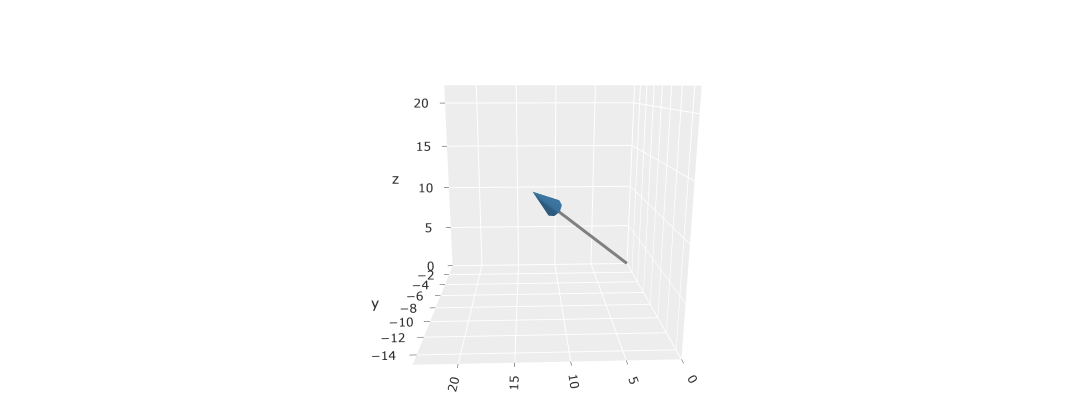

In [93]:
x, y, z = vector
# ploting line from (0, 0, 0) to (x, y, z)
line = go.Scatter3d(
    x=[0, x], y=[0, y], z=[0, z],
    marker=dict(size=1, color="black"), # single dot at both end
    line=dict(color= "gray", width=6),  # the line 
)
# poting the cone for head of vector
cone = go.Cone(
    x=[x], y=[y], z=[z], 
    u=[0.1 * (x - 0)], v=[0.1 * (y - 0)], w=[0.1 * (z - 0)], 
    sizemode="scaled", # relative to vector norm
    sizeref=2,
    showscale=False,
    anchor="center",
    text=[f"l2 norm: {np.sqrt(np.sum(x**2 + y**2 + z**2)):.4f}"], 
    hoverinfo="x+y+z+text",
) 

layout = go.Layout(
    height=400, width=400, autosize=False,
    margin=dict(l=0, r=0, b=0, t=0),
    template="ggplot2", 
    scene=dict(
        xaxis=dict(nticks=10, range=[0, 2*x]), 
        yaxis=dict(nticks=10, range=[0, 2*y]), 
        zaxis=dict(nticks=10, range=[0, 2*z]), 
      aspectmode="cube",
    ),
)

fig = go.Figure(data=[line, cone], layout=layout)
fig.show(config={'displayModeBar': False, 'scrollZoom': False})

#### What is a _unit vector_?

> A unit vector in a normed vector space is a vector of length 1

In [94]:
vector = np.array([12, -7.5, 11])

In [95]:
magnitude = np.sqrt(np.sum(vector ** 2)) # l2 norm
magnitude

17.92344832893492

In [98]:
unit_vector = vector / magnitude
unit_vector

array([ 0.66951402, -0.41844626,  0.61372119])

### Reconstruct a non-square matrix

+ Natural Language Processing in Action, chapter 4.3


In [84]:
# term-document matrix with BOW counts
# row: term; col: document 
data = np.array(
    [[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]
)
data.shape # note row num < col num, shouldn't be a common case

(6, 11)

In [86]:
U, s, Vt = np.linalg.svd(data, full_matrices=False) # input shape (6, 11), i.e. m < n
# return matrices and vector:
# U: Unitary matrix having left singular vectors as columns. 
# s: The singular values, sorted in non-increasing order.
# Vt: Unitary matrix having right singular vectors as rows
# A = (U * s) dot Vt
U.shape, s.shape, Vt.shape # 6 tokens and 11 documents

((6, 6), (6,), (6, 11))

In [87]:
reconstructed = np.multiply(U, s).dot(Vt)
np.allclose(data, reconstructed)

True

In [89]:
U, s, Vt = np.linalg.svd(data, full_matrices=True) # default
U.shape, s.shape, Vt.shape # note Vt has shape (11, 11)

((6, 6), (6,), (11, 11))

In [91]:
sigma = np.zeros((U.shape[0], Vt.shape[1]))
np.fill_diagonal(sigma, s) # fill with repeated values

reconstructed = np.dot(U, np.dot(sigma, Vt))
np.allclose(data, reconstructed)

True

## Questions to Think


### Q1, Why is eigenvector important for PCA?
+ The eigevectors are orthogonal to each other, meaning they will be least correlated 
+ The eigenvalues are just the magnetitute of the eigenvectors, and eigenvectors are unit vectors 


## References

overview of eigendecomposition

+ https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix
+ https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/
+ https://github.com/hadrienj/deepLearningBook-Notes
+ http://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html  


visualized introductions

+ https://www.geogebra.org/m/JP2XZpzV
+ https://setosa.io/ev/eigenvectors-and-eigenvalues/
+ https://alyssaq.github.io/2015/understanding-eigenvectors-and-eigenvalues-visually/
+ https://stackoverflow.com/questions/43164909/plotlypython-how-to-plot-arrows-in-3d

svd 
+ https://en.wikipedia.org/wiki/Singular_value_decomposition

eigenvector to PCA

+ https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
+ https://stats.stackexchange.com/questions/217995/what-is-an-intuitive-explanation-for-how-pca-turns-from-a-geometric-problem-wit
+ https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

wasteland3: Z32C3-QJZLT-VNQ5B